In [1]:
import numpy as np
from pathlib import Path
olderr = np.seterr(divide='ignore')

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs

plt.rcParams['figure.figsize'] = (25, 10)

In [2]:
from box import Box, DataSet
from units import unit
from plotting import (plot_mollweide, plot_orthographic_np, plot_plate_carree, earth_plot)

In [3]:
# settings

data_folder = Path("/mnt/Knolselderij/bulk/Abrupt/")
month = 3

sigma_d = unit('200 km')
sigma_t = unit('5 year')

gamma = 1
scaling_factor = gamma * unit('10 km/year')
sobel_delta_t = unit('1 year')
sobel_delta_d = sobel_delta_t * scaling_factor
sobel_weights = [sobel_delta_t, sobel_delta_d, sobel_delta_d]

In [4]:
control_set = DataSet(
    path=data_folder,
    model='MPI-ESM-LR',
    variable='sic',
    scenario='piControl',
    realization='r1i1p1',
    extension='regrid.nc')
control_set.load()

In [5]:
control_data = control_set.data[month-1::12]
control_box = control_set.box[month-1::12]
smooth_control_data = control_box.gaussian_filter(control_data, [sigma_t, sigma_d, sigma_d])

/home/johannes/.local/share/workon/abrupt/lib/python3.6/site-packages/scipy/ndimage/filters.py:347: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  output[...] = input[...]


In [6]:
sbc = control_box.sobel_filter(smooth_control_data, weight=sobel_weights)

/mnt/Knolselderij/johannes/Code/Abrupt/notebooks/filters.py:180: RuntimeWarning: invalid value encountered in true_divide
  sb /= norm


In [7]:
cal = control_box.calibrate_sobel(smooth_control_data, sobel_delta_t, sobel_delta_d)

/mnt/Knolselderij/johannes/Code/Abrupt/notebooks/filters.py:180: RuntimeWarning: invalid value encountered in true_divide
  sb /= norm
/mnt/Knolselderij/johannes/Code/Abrupt/notebooks/box.py:303: RuntimeWarning: invalid value encountered in true_divide
  'gamma': np.sqrt(ft / fx)


In [8]:
for k, v in cal.items():
    print("{:10}: {}".format(k, v))
print("recommended setting for gamma: ", cal['gamma'][3])

time      : [ 0.          0.01828225  0.04082416  0.06873773  0.21217807]
distance  : [ 0.          0.00935684  0.01570263  0.02434682  0.08487605]
magnitude : [0.030298026278614998 0.030298026278614998 0.030298026278614998
 0.030298026278614998 0.030298026278614998]
gamma     : [        nan  1.95389187  2.59982896  2.82327318  2.49985814]
recommended setting for gamma:  2.82327


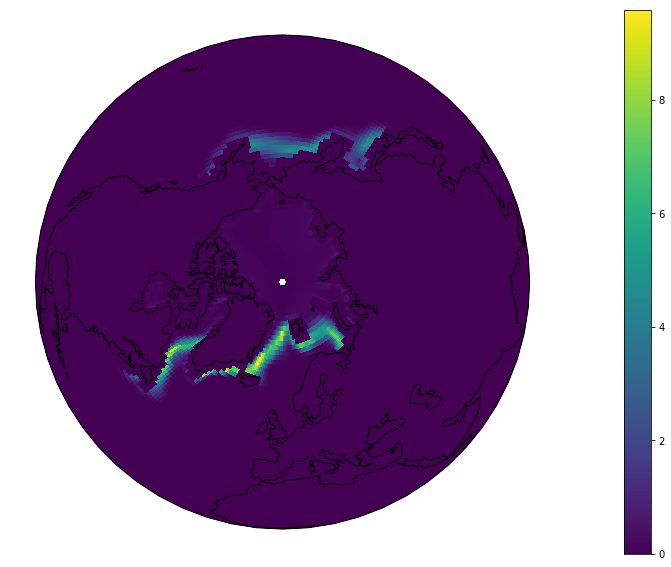

In [7]:
plot_orthographic_np(control_box, (1./sbc[3,100]).filled(0.0))

In [12]:
smooth_control_data.mean()

14.16717611469157

In [13]:
control_data.mean()

14.167175062475339

In [20]:
from scipy import ndimage

In [18]:
smooth_control_data.min()

0.0

In [51]:
new_mask = ndimage.binary_dilation(smooth_control_data.mask, ndimage.generate_binary_structure(3, 3), iterations=1)

In [61]:
sbcm = np.ma.MaskedArray(sbc, np.repeat(new_mask[None,:,:,:], 4, axis=0))

In [8]:
norm = 1./sbc[3]

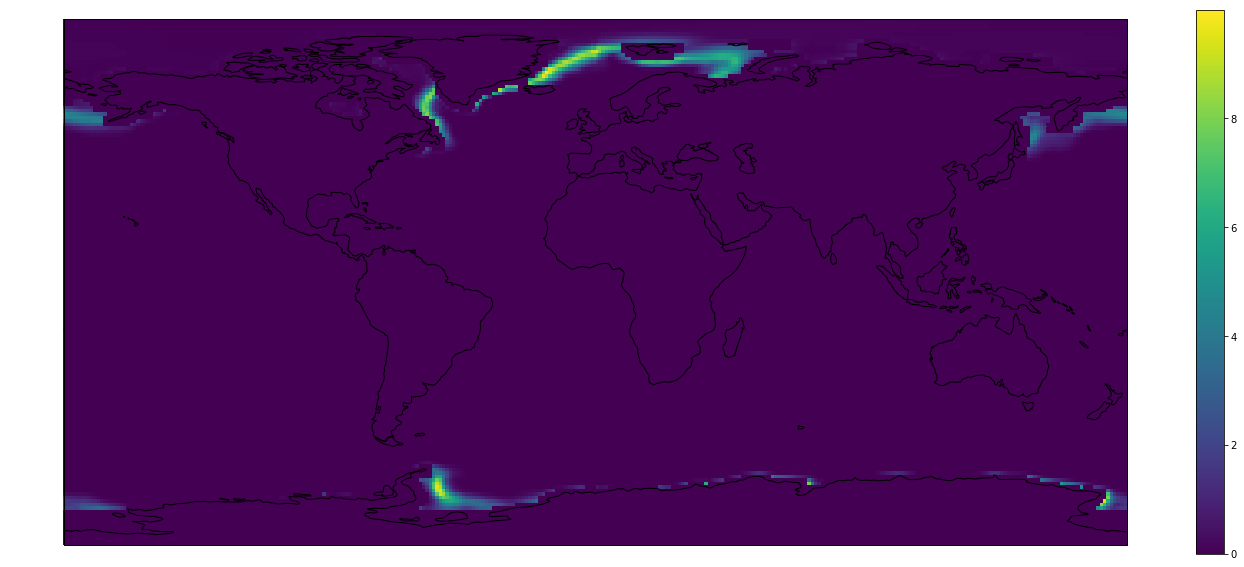

In [12]:
plot_plate_carree(control_box, norm[20].filled(0.0))

In [65]:
type(sbcm)

numpy.ma.core.MaskedArray